Welcome to Data Analyses and Insights of Covid - 19

In [1146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1147]:
df = pd.read_csv("covid_data.csv")

Data Cleaning and handling


In [1148]:
df.at[6, 'Country'] = 'Antarctica'
df = df[df['Country'].str.strip().str.lower() != 'total:']
df = df[df['Country'].str.strip().str.lower() != 'world']
df = df.dropna(subset=['Country'])
df = df.drop_duplicates(subset='Country')
df = df.reset_index(drop=True)
df.fillna(0,inplace=True)

In [1149]:
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths
0,North America,"128,176,011",0.0,"1,645,417",0.0
1,Asia,"220,733,449",67.0,"1,549,698",0.0
2,Europe,"249,987,374",58.0,"2,071,024",1.0
3,South America,"68,987,851",0.0,"1,360,616",0.0
4,Oceania,"14,644,324",0.0,"30,358",0.0
...,...,...,...,...,...
233,Tokelau,80,0.0,0,0.0
234,Vatican City,29,0.0,0,0.0
235,Western Sahara,10,0.0,1,0.0
236,MS Zaandam,9,0.0,2,0.0


In [1150]:
continents_df = df.head(7)
continents_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths
0,North America,"128,176,011",0.0,"1,645,417",0.0
1,Asia,"220,733,449",67.0,"1,549,698",0.0
2,Europe,"249,987,374",58.0,"2,071,024",1.0
3,South America,"68,987,851",0.0,"1,360,616",0.0
4,Oceania,"14,644,324",0.0,"30,358",0.0
5,Africa,"12,837,874",0.0,"258,830",0.0
6,Antarctica,721,0.0,15,0.0


In [1151]:
countries_df = df.iloc[7:]
countries_df = countries_df.reset_index(drop=True)
countries_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths
0,USA,"108,429,339",0.0,"1,175,172",0.0
1,India,"44,998,162",0.0,"531,930",0.0
2,France,"40,138,560",0.0,"167,642",0.0
3,Germany,"38,428,685",0.0,"174,352",0.0
4,Brazil,"37,789,040",0.0,"705,313",0.0
...,...,...,...,...,...
226,Tokelau,80,0.0,0,0.0
227,Vatican City,29,0.0,0,0.0
228,Western Sahara,10,0.0,1,0.0
229,MS Zaandam,9,0.0,2,0.0


In [1152]:
countries_df.to_csv("Countries_df.csv",index=False)
continents_df.to_csv("continents_df.csv",index=False)

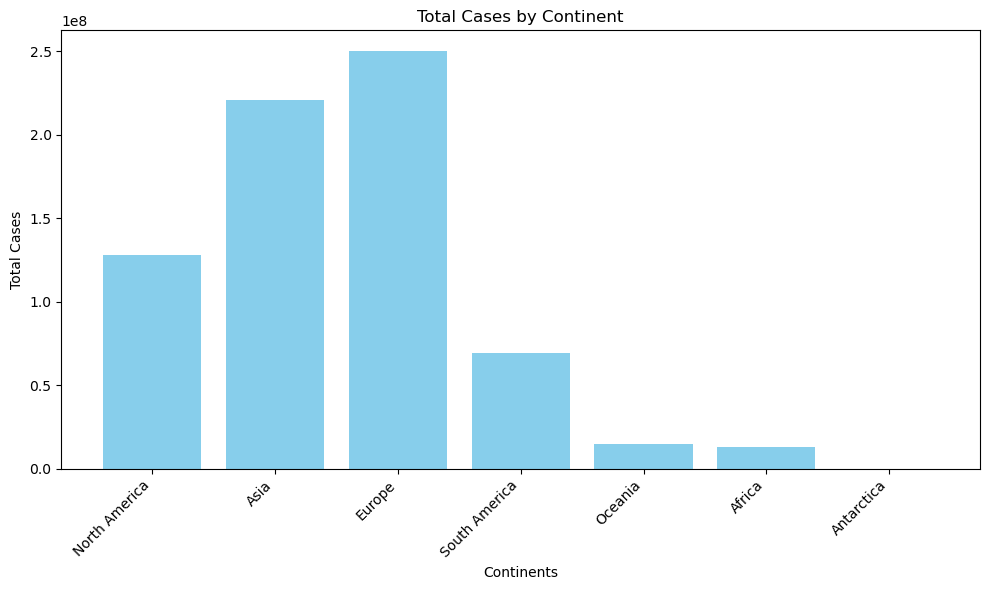

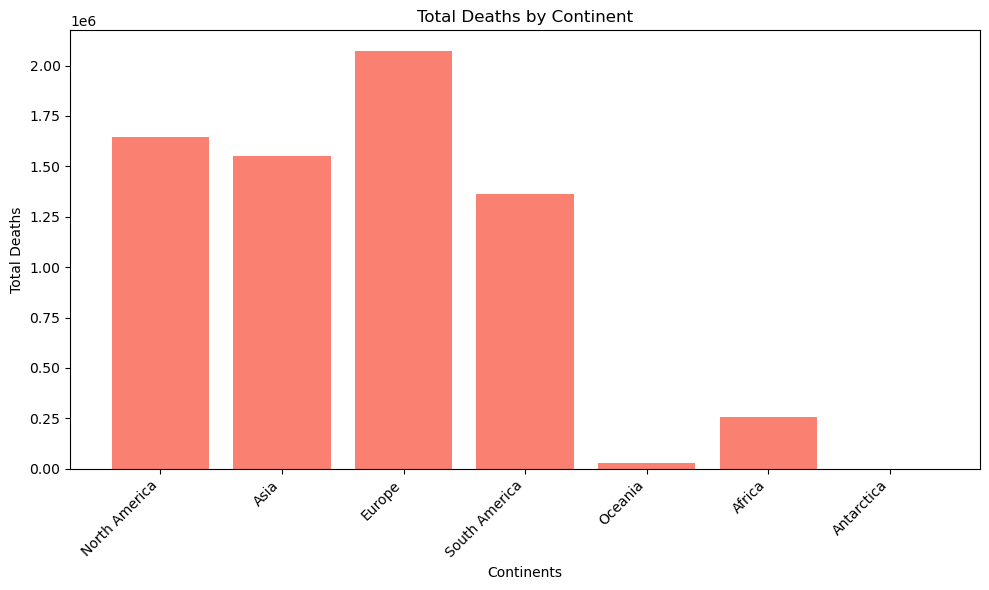

In [1153]:
# Plot Total Cases

continents_df.loc[:, 'Total Cases'] = continents_df['Total Cases'].replace(',', '', regex=True).astype(int)
plt.figure(figsize=(10, 6))
plt.bar(continents_df['Country'], continents_df['Total Cases'], color='skyblue')
plt.xlabel('Continents')
plt.ylabel('Total Cases')
plt.title('Total Cases by Continent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Total Deaths
continents_df.loc[:, 'Total Deaths'] = continents_df['Total Deaths'].replace(',', '', regex=True).astype(int)
plt.figure(figsize=(10, 6))
plt.bar(continents_df['Country'], continents_df['Total Deaths'], color='salmon')
plt.xlabel('Continents')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Continent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



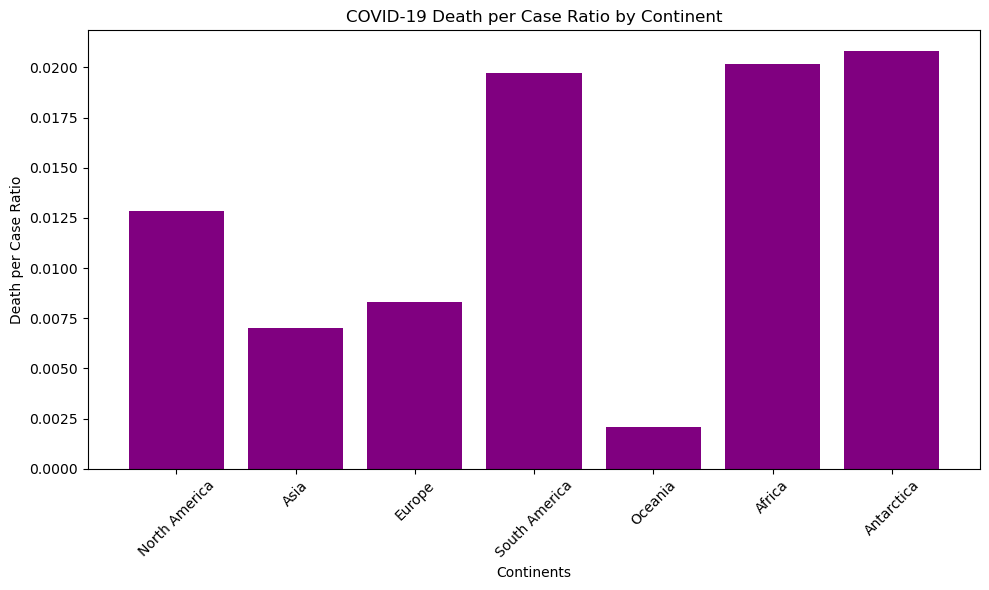

In [1154]:
continents_df = continents_df.copy()

continents_df['Total Cases'] = continents_df['Total Cases'].astype(float)
continents_df['Total Deaths'] = continents_df['Total Deaths'].astype(float)

# Calculate the ratio
continents_df['Death per Case Ratio'] = continents_df['Total Deaths'] / continents_df['Total Cases']

plt.figure(figsize=(10, 6))
plt.bar(continents_df['Country'], continents_df['Death per Case Ratio'], color='purple')
plt.xlabel('Continents')
plt.ylabel('Death per Case Ratio')
plt.title('COVID-19 Death per Case Ratio by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

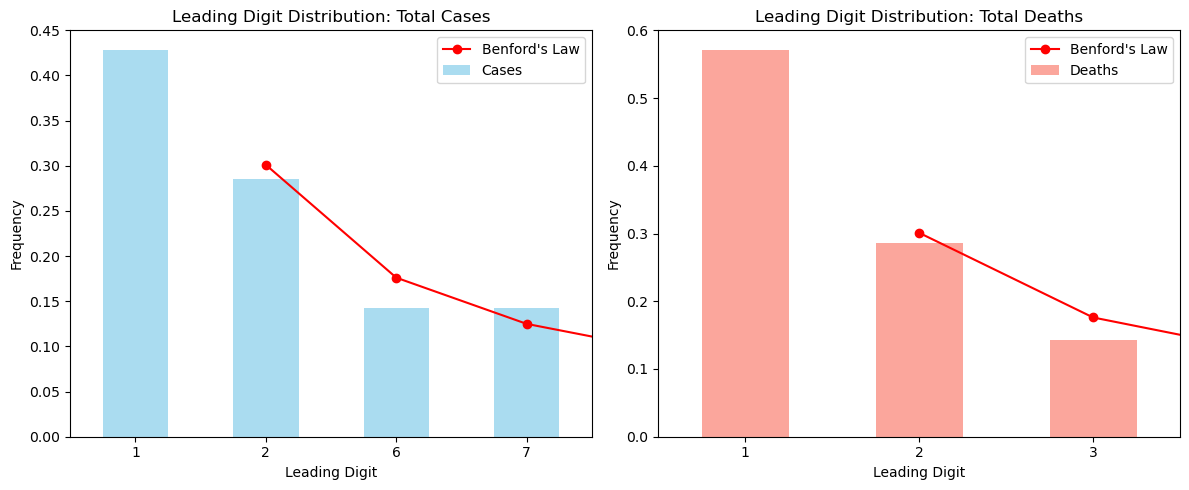

In [1155]:
leading_digits_cases = continents_df['Total Cases'].astype(str).str[0].astype(int)
leading_digits_deaths = continents_df['Total Deaths'].astype(str).str[0].astype(int)

# Calculate frequency
cases_freq = leading_digits_cases.value_counts(normalize=True).sort_index()
deaths_freq = leading_digits_deaths.value_counts(normalize=True).sort_index()

# Benford expected distribution
benford_dist = pd.Series(
    [np.log10(1 + 1/d) for d in range(1, 10)],
    index=range(1, 10)
)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cases_freq.plot(kind='bar', color='skyblue', label='Cases', alpha=0.7)
benford_dist.plot(kind='line', color='red', marker='o', label="Benford's Law")
plt.title("Leading Digit Distribution: Total Cases")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
deaths_freq.plot(kind='bar', color='salmon', label='Deaths', alpha=0.7)
benford_dist.plot(kind='line', color='red', marker='o', label="Benford's Law")
plt.title("Leading Digit Distribution: Total Deaths")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

Here are Data Insights from Continents Wise

In [1156]:
# Maximum cases and deaths
max_cases_continent = continents_df.loc[continents_df['Total Cases'].idxmax()]
max_deaths_continent = continents_df.loc[continents_df['Total Deaths'].idxmax()]

# Minimum cases and deaths
min_cases_continent = continents_df.loc[continents_df['Total Cases'].idxmin()]
min_deaths_continent = continents_df.loc[continents_df['Total Deaths'].idxmin()]

# Output the results
print(f"Continent with the highest total cases: {max_cases_continent['Country']} with {max_cases_continent['Total Cases']:,} cases")
print(f"Continent with the highest total deaths: {max_deaths_continent['Country']} with {max_deaths_continent['Total Deaths']:,} deaths")
# Calculate the Death per Case Ratio if not already done
continents_df['Death per Case Ratio'] = continents_df['Total Deaths'] / continents_df['Total Cases']

# Find the country (continent) with the highest and lowest Death per Case Ratio
max_ratio_row = continents_df.loc[continents_df['Death per Case Ratio'].idxmax()]
min_ratio_row = continents_df.loc[continents_df['Death per Case Ratio'].idxmin()]

# Output the results
print(f"Continent with highest Death per Case Ratio: {max_ratio_row['Country']} with a ratio of {max_ratio_row['Death per Case Ratio']:.4f}")
print(f"Continent with lowest Death per Case Ratio: {min_ratio_row['Country']} with a ratio of {min_ratio_row['Death per Case Ratio']:.4f}")

print(f"Continent with the least total cases: {min_cases_continent['Country']} with {min_cases_continent['Total Cases']:,} cases")
print(f"Continent with the least total deaths: {min_deaths_continent['Country']} with {min_deaths_continent['Total Deaths']:,} deaths")
continents_with_new_cases = continents_df[continents_df['New Cases'] > 0]


print(continents_with_new_cases[['Country', 'New Cases']])
print("Continents with new deaths 'Europe' : 1 case ")


Continent with the highest total cases: Europe with 249,987,374.0 cases
Continent with the highest total deaths: Europe with 2,071,024.0 deaths
Continent with highest Death per Case Ratio: Antarctica with a ratio of 0.0208
Continent with lowest Death per Case Ratio: Oceania with a ratio of 0.0021
Continent with the least total cases: Antarctica with 721.0 cases
Continent with the least total deaths: Antarctica with 15.0 deaths
  Country  New Cases
1    Asia       67.0
2  Europe       58.0
Continents with new deaths 'Europe' : 1 case 


In [1157]:
df = pd.read_csv('Countries_df.csv')

In [1158]:

# Clean data
df['Total Cases'] = df['Total Cases'].replace(',', '', regex=True).astype(float)
df['Total Deaths'] = df['Total Deaths'].replace(',', '', regex=True).astype(float)
df['New Cases'] = df['New Cases'].replace(',', '', regex=True).replace('', '0').astype(float)
df['New Deaths'] = df['New Deaths'].replace(',', '', regex=True).replace('', '0').astype(float)


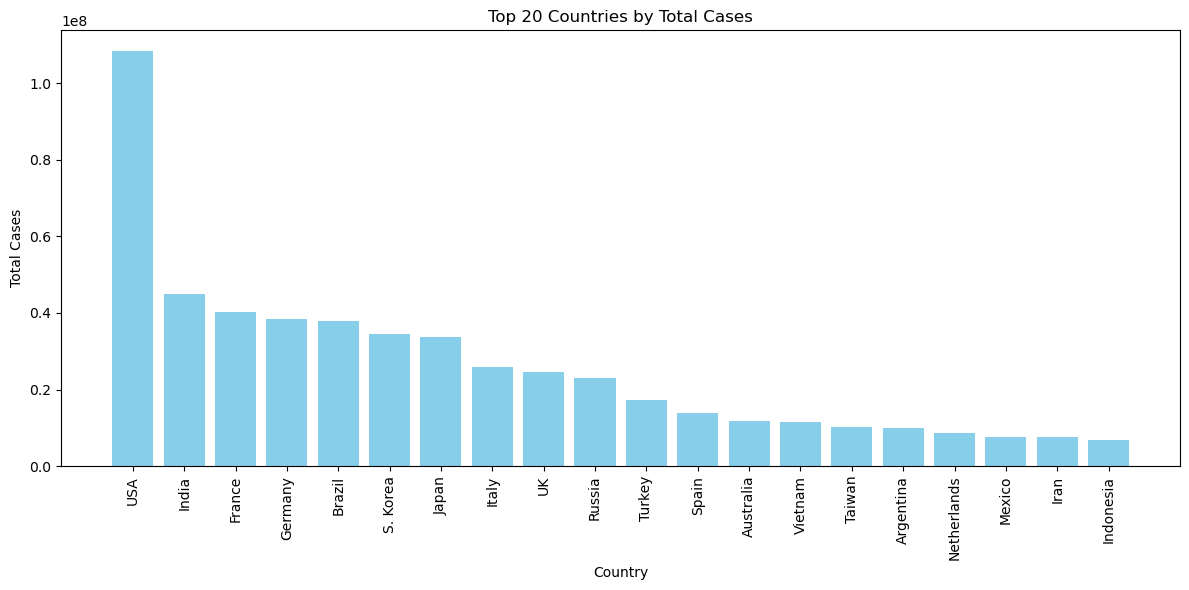

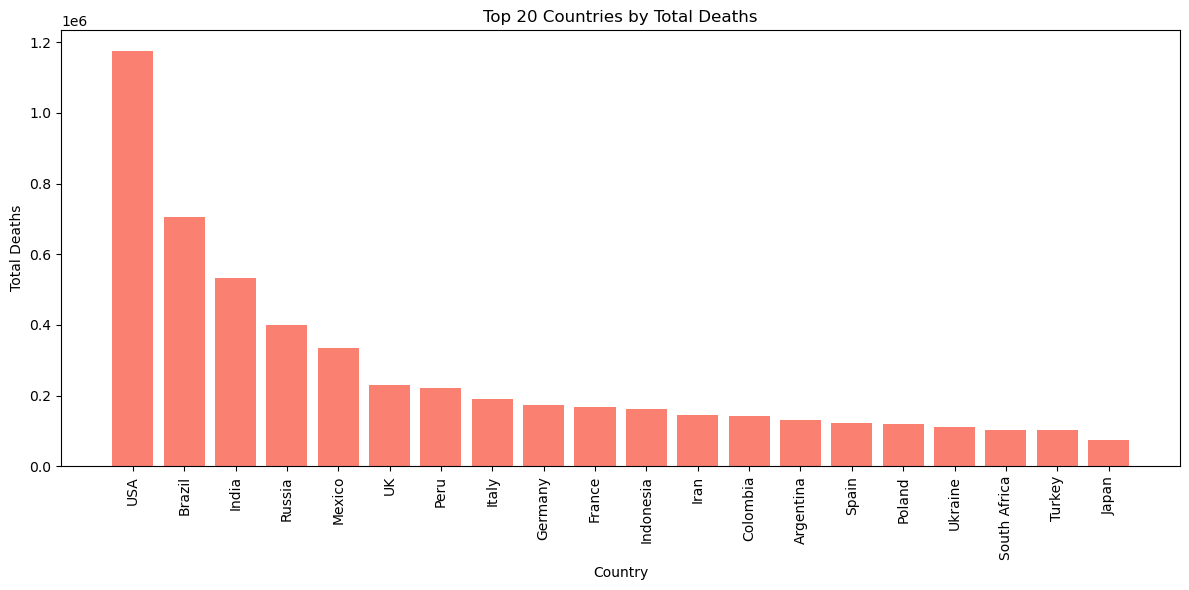

In [1159]:
# Plot Total Cases by Country (Top 20 for visibility)
top_cases = df.sort_values(by='Total Cases', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_cases['Country'], top_cases['Total Cases'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 20 Countries by Total Cases')
plt.tight_layout()
plt.show()

# Plot Total Deaths by Country (Top 20)
top_deaths = df.sort_values(by='Total Deaths', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_deaths['Country'], top_deaths['Total Deaths'], color='salmon')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 20 Countries by Total Deaths')
plt.tight_layout()
plt.show()



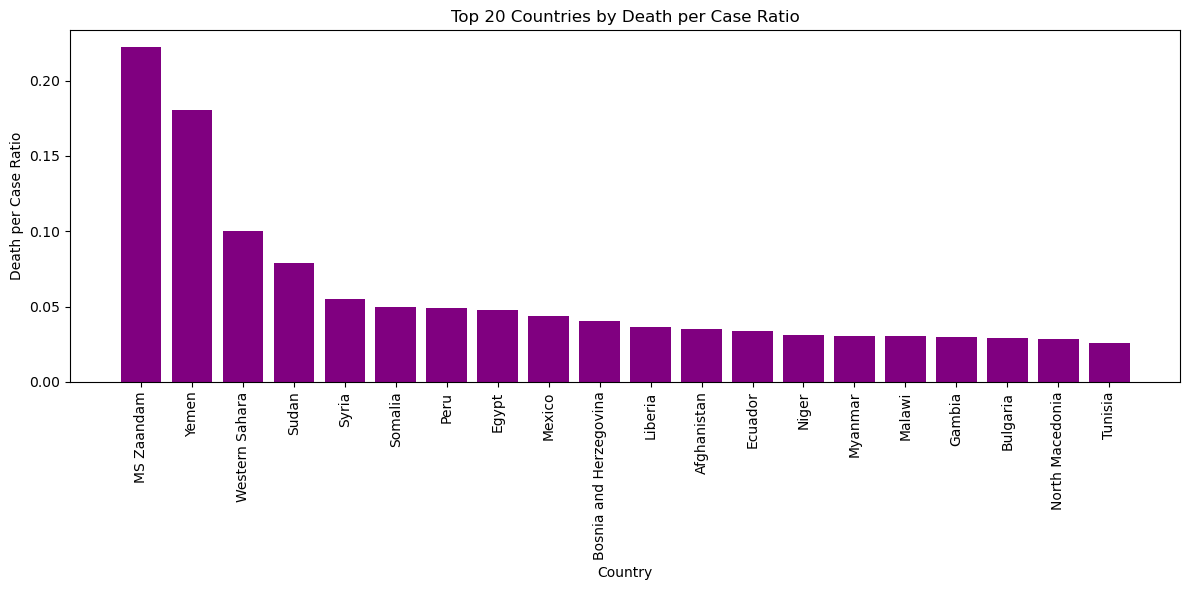

In [1160]:
# Death per Case Ratio
df['Death per Case Ratio'] = df['Total Deaths'] / df['Total Cases']
top_ratio = df.sort_values(by='Death per Case Ratio', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_ratio['Country'], top_ratio['Death per Case Ratio'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Death per Case Ratio')
plt.title('Top 20 Countries by Death per Case Ratio')
plt.tight_layout()
plt.show()


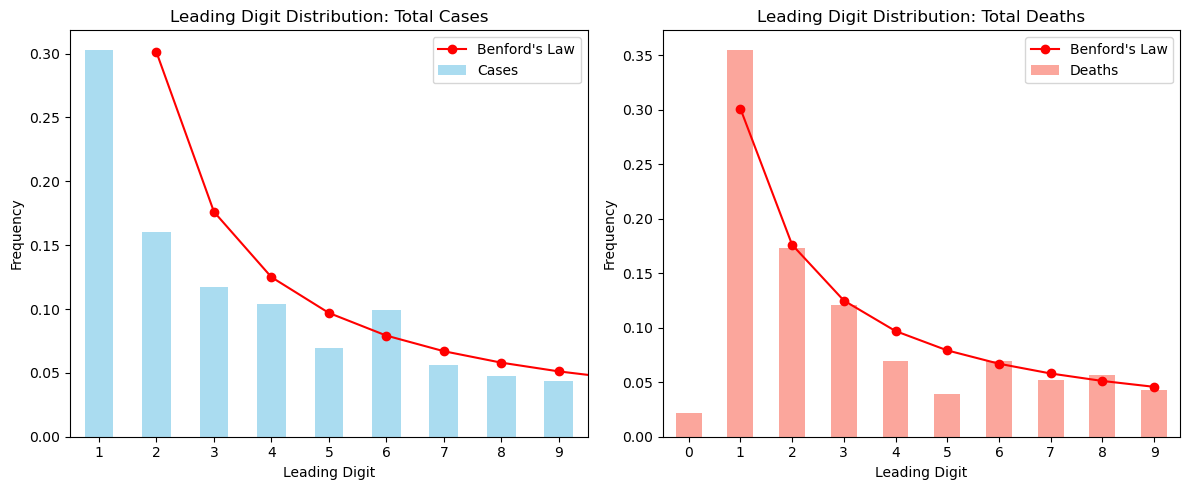

In [1161]:

# Benford's Law Comparison
leading_digits_cases = df['Total Cases'].astype(str).str.replace('.', '').str.replace(',', '').str.strip().str[0].astype(int)
leading_digits_deaths = df['Total Deaths'].astype(str).str.replace('.', '').str.replace(',', '').str.strip().str[0].astype(int)

cases_freq = leading_digits_cases.value_counts(normalize=True).sort_index()
deaths_freq = leading_digits_deaths.value_counts(normalize=True).sort_index()
benford_dist = pd.Series([np.log10(1 + 1/d) for d in range(1, 10)], index=range(1, 10))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cases_freq.plot(kind='bar', color='skyblue', label='Cases', alpha=0.7)
benford_dist.plot(kind='line', color='red', marker='o', label="Benford's Law")
plt.title("Leading Digit Distribution: Total Cases")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
deaths_freq.plot(kind='bar', color='salmon', label='Deaths', alpha=0.7)
benford_dist.plot(kind='line', color='red', marker='o', label="Benford's Law")
plt.title("Leading Digit Distribution: Total Deaths")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


Here are the Data Insight Countries Wise

In [1162]:
# Insights
max_cases = df.loc[df['Total Cases'].idxmax()]
max_deaths = df.loc[df['Total Deaths'].idxmax()]
min_cases = df.loc[df['Total Cases'].idxmin()]
min_deaths = df.loc[df['Total Deaths'].idxmin()]
max_ratio = df.loc[df['Death per Case Ratio'].idxmax()]
min_ratio = df.loc[df['Death per Case Ratio'].idxmin()]

print(f"Country with highest total cases: {max_cases['Country']} with {int(max_cases['Total Cases']):,} cases")
print(f"Country with highest total deaths: {max_deaths['Country']} with {int(max_deaths['Total Deaths']):,} deaths")
print(f"Country with highest Death per Case Ratio: {max_ratio['Country']} with a ratio of {max_ratio['Death per Case Ratio']:.4f}")
print(f"Country with lowest Death per Case Ratio: {min_ratio['Country']} with a ratio of {min_ratio['Death per Case Ratio']:.4f}")
print(f"Country with least total cases: {min_cases['Country']} with {int(min_cases['Total Cases']):,} cases")
print(f"Country with least total deaths: {min_deaths['Country']} with {int(min_deaths['Total Deaths']):,} deaths")

countries_with_new_cases = df[df['New Cases'] > 0]
print("\nCountries with new cases:")
print(countries_with_new_cases[['Country', 'New Cases']])

countries_with_new_deaths = df[df['New Deaths'] > 0]
print("\nCountries with new deaths:")
print(countries_with_new_deaths[['Country', 'New Deaths']])

Country with highest total cases: USA with 108,429,339 cases
Country with highest total deaths: USA with 1,175,172 deaths
Country with highest Death per Case Ratio: MS Zaandam with a ratio of 0.2222
Country with lowest Death per Case Ratio: Saint Helena with a ratio of 0.0000
Country with least total cases: MS Zaandam with 9 cases
Country with least total deaths: Saint Helena with 0 deaths

Countries with new cases:
         Country  New Cases
13       Vietnam       27.0
20        Poland       15.0
33       Czechia       28.0
56      Slovenia       15.0
83       Myanmar        1.0
111  Afghanistan       37.0
112         Laos        2.0

Countries with new deaths:
    Country  New Deaths
33  Czechia         1.0


# Contributions

* Data Cleaning and handling - Vansh Jain
* Dashboard - Anurag Singh Tomar
* Insights and Analysis - Anurag Singh Tomar and Vinay Sharma
* Benford's Law Analysis- Meet Ramatri